In [529]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)\
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import svm
from sklearn.ensemble import GradientBoostingRegressor 


from sklearn.metrics import accuracy_score , precision_score , recall_score , f1_score , classification_report

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression , LinearRegression 
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [530]:
df = pd.read_csv(r'C:\Users\Islam\Desktop\projects bi\Advertising.csv\archive_3\Advertising.csv')

In [531]:
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [532]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [533]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [534]:
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [535]:
df.drop('Unnamed: 0', axis=1 , inplace=True)


In [536]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


array([[<Axes: title={'center': 'TV'}>,
        <Axes: title={'center': 'Radio'}>],
       [<Axes: title={'center': 'Newspaper'}>,
        <Axes: title={'center': 'Sales'}>]], dtype=object)

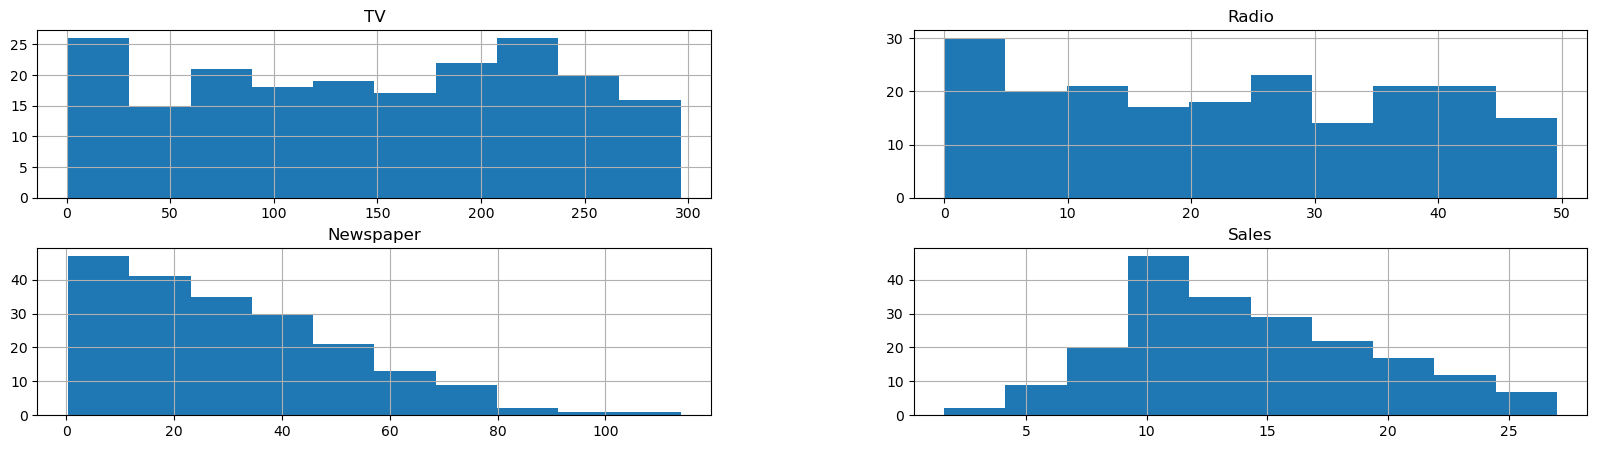

In [537]:
df.hist()

<Axes: ylabel='Newspaper'>

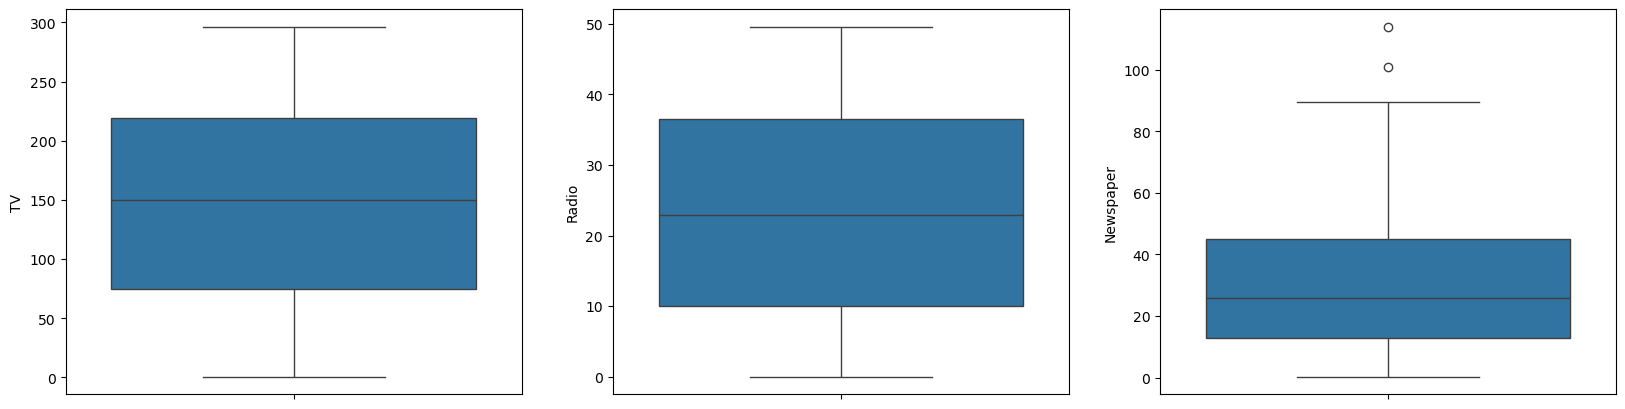

In [538]:

plt.subplot(1,3,1)
sns.boxplot(df['TV'])

plt.subplot(1,3,2)
sns.boxplot(df['Radio'])

plt.subplot(1,3,3)
sns.boxplot(df['Newspaper'])


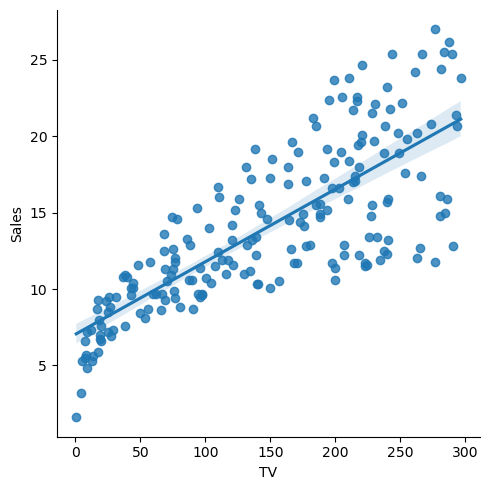

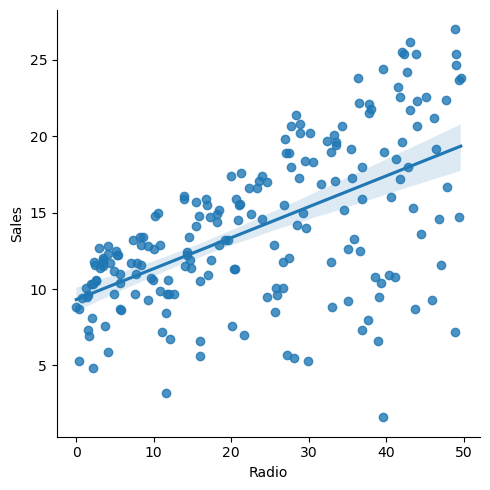

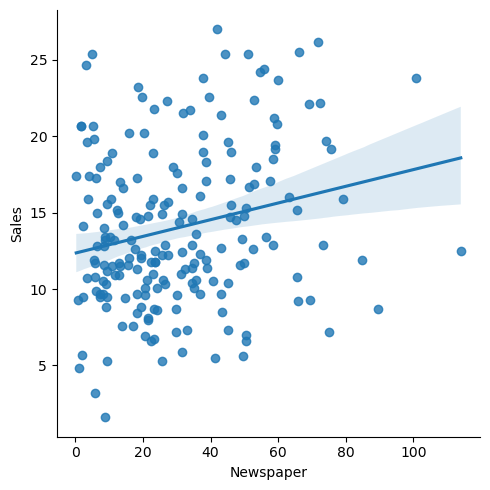

In [539]:
sns.lmplot(x='TV', y='Sales', data=df)
sns.lmplot(x='Radio', y='Sales', data=df)
sns.lmplot(x='Newspaper',y= 'Sales', data=df)

In [540]:
df=df[df['Newspaper']<100]

<Axes: xlabel='Newspaper', ylabel='Density'>

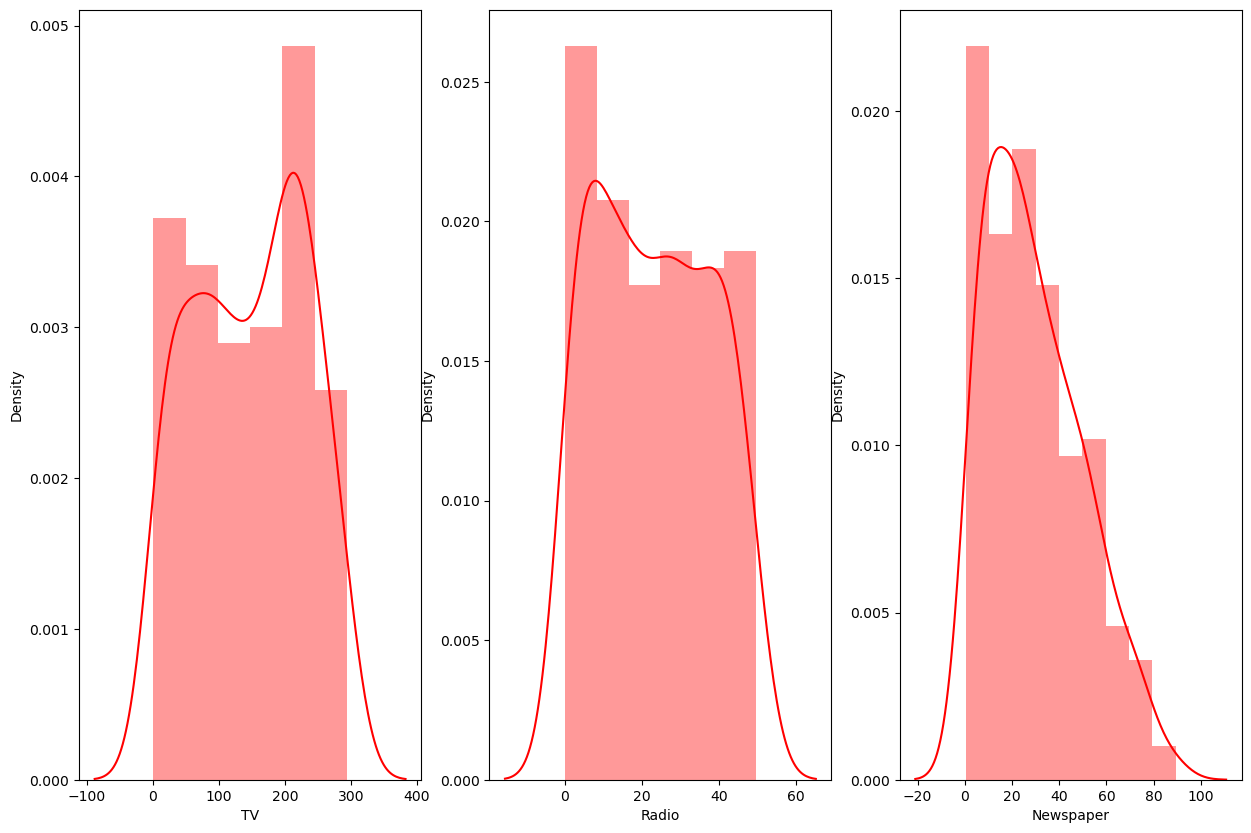

In [541]:
plt.rcParams['figure.figsize']=(15,10)

plt.subplot(1,3,1)
sns.distplot(df['TV'],color='red')

plt.subplot(1,3,2)
sns.distplot(df['Radio'],color='red')

plt.subplot(1,3,3)
sns.distplot(df['Newspaper'],color='red')

<Axes: xlabel='Sales', ylabel='Density'>

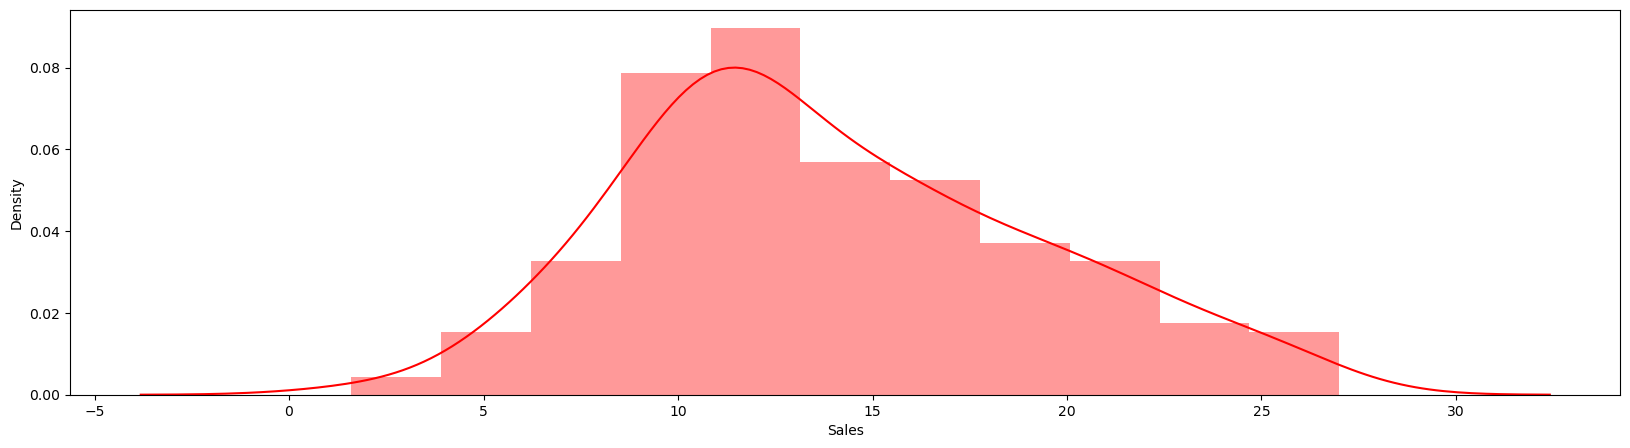

In [542]:
plt.rcParams['figure.figsize']=(20,5)
sns.distplot(df['Sales'],color='red')

<Axes: >

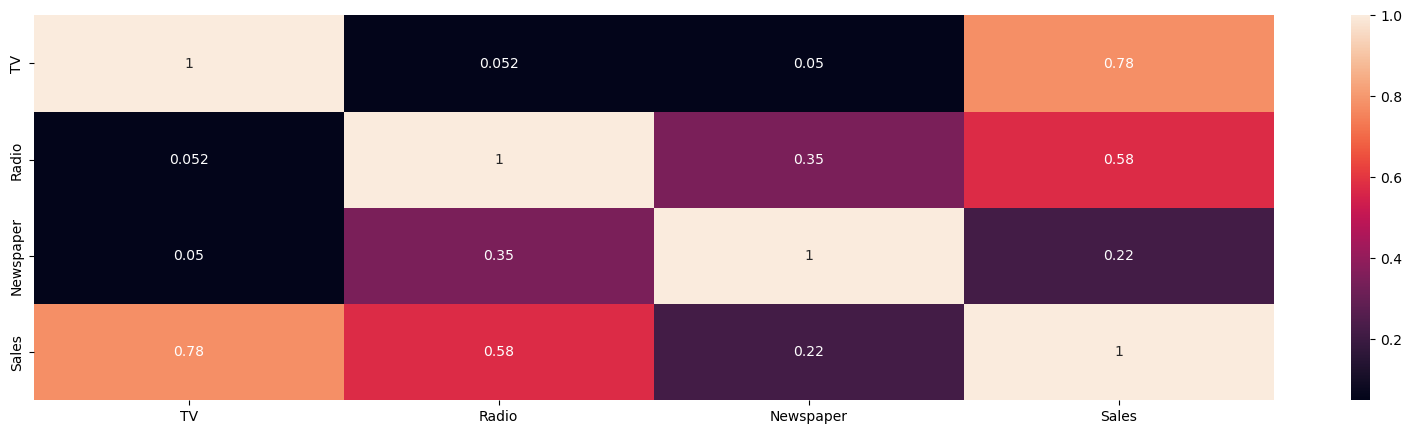

In [543]:
sns.heatmap(df.corr(),annot=True)


In [544]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
col=["TV","Radio","Newspaper"]
df[col]=scaler.fit_transform(df[col])

In [545]:
x = df.drop(['Sales'], axis=1)
y = df['Sales']
#scaler = StandardScaler()
#x_scaled = scaler.fit_transform(x)
#y_scaled = scaler.fit_transform(y.values.reshape(-1, 1)) 


In [546]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.2 , random_state=10)


In [547]:
LogisticRegressionS=LogisticRegression()
GradientBoostingRegressorS = GradientBoostingRegressor()
LinearRegressions = LinearRegression()


In [548]:
def models(model):
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print("Mean Squared Error:", mse)
    print("R-squared:", r2)
    


In [549]:
models(LinearRegressions)

Mean Squared Error: 3.3458719320317223
R-squared: 0.8631142993837254


# Got 86% Accuracy¶


In [563]:
models(GradientBoostingRegressorS)



Mean Squared Error: 1.1816647288846058
R-squared: 0.951655948705518


# Got 95% Accuracy¶

